In [48]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.preprocessing import MinMaxScaler
import string
from nltk.corpus import stopwords

# Download necessary NLTK resources
# nltk.download('punkt')
# nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
# Define directories for each dataset
directories = {
    'agoda_hotel_reviews': (1, 10),  
    'tripadvisor_hotel_reviews': (1, 5),
    'klook_hotel_reviews': (1, 5),  
    'booking_hotel_reviews': (1, 10)
}

In [49]:
# Function to load and normalize data
def load_and_normalize_data():
    all_reviews = []
    for directory, (min_score, max_score) in directories.items():           
        path = os.path.join('raw data', directory)
        for filename in os.listdir(path):
            if filename.endswith('.csv'):
                df = pd.read_csv(os.path.join(path, filename))
                scaler = MinMaxScaler(feature_range=(0, 1))
                df['normalized_score'] = scaler.fit_transform(df[['Review Score']])
                all_reviews.append(df)
    return pd.concat(all_reviews, ignore_index=True)

# Load and normalize data
df = load_and_normalize_data()

In [70]:
# Function to lemmatize text
def preprocess_text(text):
    # Step 1: Convert text to lowercase
    text = text.lower()

    # Step 2: Remove punctuation
    # You can translate punctuation to None (removing it)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Step 3: Tokenization
    tokens = nltk.word_tokenize(text)

    # Step 4: Remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5: Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Return the processed text as a single string
    return ' '.join(lemmatized_tokens)

# Lemmatize the review content
df['cleaned_content'] = df['Review Content'].apply(preprocess_text)

In [71]:
# Convert normalized scores to binary labels (1 for positive, 0 for negative)
df['label'] = df['normalized_score'].apply(lambda x: -1 if x <= 0.25 else (1 if x >= 0.75 else 0))
print(df.head())

print(df[['normalized_score', 'label']].describe())

  Review Provider  Review ID  \
0           Agoda  831639368   
1           Agoda  830646554   
2           Agoda  830862563   
3           Agoda  830828036   
4           Agoda  823596890   

                                      Review Content  Review Score  \
0  hotel facility top notch well maintained ameni...           9.6   
1  enjoyed stay bai hotel price reasonable room n...          10.0   
2                                     favorite hotel          10.0   
3  hotel accommodating good staff great ambiance ...          10.0   
4                                   well recommended          10.0   

                 Review Time  normalized_score  label  \
0  2024-07-16T09:26:00+07:00              0.95      1   
1  2024-07-15T12:05:00+07:00              1.00      1   
2  2024-07-15T07:56:00+07:00              1.00      1   
3  2024-07-15T04:07:00+07:00              1.00      1   
4  2024-07-14T07:00:00+07:00              1.00      1   

                                     cleane

In [72]:
# Count the occurrences of each label
positive_count = (df['label'] == 1).sum()
negative_count = (df['label'] == -1).sum()
neutral_count = (df['label'] == 0).sum()

# Print the counts
print(f'Positive reviews: {positive_count}')
print(f'Negative reviews: {negative_count}')
print(f'Neutral reviews: {neutral_count}')
print(f"Total: {df['label'].count()}")

Positive reviews: 8403
Negative reviews: 394
Neutral reviews: 1445
Total: 10242


In [74]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_content'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_content'])
padded_sequences = pad_sequences(sequences, maxlen=100)

# Prepare labels
labels = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, stratify=labels, random_state=42)




Epoch 1/10


c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


180/180 ━━━━━━━━━━━━━━━━━━━━ 30s 110ms/step - accuracy: 0.8211 - loss: 0.4566 - val_accuracy: 0.8389 - val_loss: 0.3908
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.8695 - loss: 0.1590 - val_accuracy: 0.8152 - val_loss: 0.3723
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.8685 - loss: 0.0876 - val_accuracy: 0.8298 - val_loss: -0.1839
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.8473 - loss: -5.5023 - val_accuracy: 0.8326 - val_loss: -3.0096
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.8681 - loss: -25.2940 - val_accuracy: 0.8285 - val_loss: 33.3146
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - accuracy: 0.8604 - loss: -53.8651 - val_accuracy: 0.8319 - val_loss: -10.9258
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.8632 - loss: -172.5874 - val_accuracy: 0.8305 - val_loss: -6.1791
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.8615 - loss:

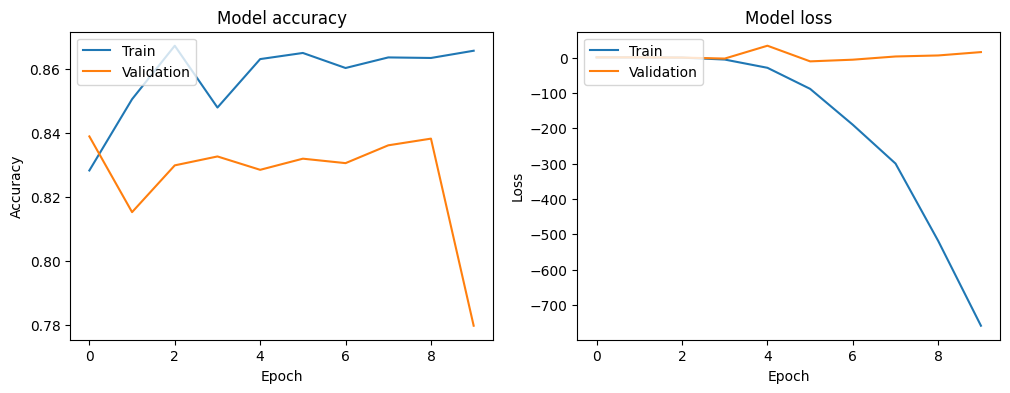

In [75]:


# Model Creation
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [104]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Example input reviews
new_reviews = [
    {"review": "The hotel staff was incredibly helpful and the room was clean and spacious. Definitely a positive experience!", "score": 1.0},
    {"review": "The location was good, but the room had a strange smell and the service was just okay.", "score": 0.6},
    {"review": "I had a terrible stay. The room was dirty and the staff was rude. Not worth the price.", "score": 0.2},
    {"review": "Amazing experience! The view from the room was breathtaking and the food at the restaurant was top-notch.", "score": 1.0},
    {"review": "The room was decent, but the Wi-Fi was slow and unreliable. It was an average stay overall.", "score": 0.5},
    {"review": "Terrible service! We waited over an hour for our room to be ready and the staff was not apologetic.", "score": 0.3},
    {"review": "The hotel was in a perfect location, close to all the major attractions. The room was comfortable and well-maintained.", "score": 0.9},
    {"review": "The facilities were outdated, and the air conditioning barely worked. I was disappointed with my stay.", "score": 0.4},
    {"review": "Great value for money! The hotel offered a lot of amenities and the staff was very friendly.", "score": 0.8},
    {"review": "The breakfast was good, but the room was small and the bed was uncomfortable. It was an okay stay.", "score": 0.6}
]



# Define a function to preprocess new input data
def preprocess_new_data(new_data):
    # Apply the same preprocessing function
    cleaned_data = [preprocess_text(text) for text in new_data]
    
    # Convert to sequences using the trained tokenizer
    sequences = tokenizer.texts_to_sequences(cleaned_data)
    
    # Pad the sequences
    padded_sequences = pad_sequences(sequences, maxlen=100)  # Use the same maxlen as your training data

    return padded_sequences

review_content = [entry["review"] for entry in new_reviews]
padded_sequences =  preprocess_new_data(review_content)

# Make predictions
predictions = model.predict(padded_sequences)

# Interpreting the predictions
for i, prediction in enumerate(predictions):
    predicted_label = -1 if prediction <= 0.25 else (1 if prediction >= 0.75 else 0)
    predicted_score = prediction[0]  # For a continuous score
    print(f"Review: {new_reviews[i]['review']}")
    print(f"Review Score: {new_reviews[i]['score']}")
    print(f"Predicted Label: {predicted_label} {'Positive' if predicted_label == 1 else 'Negative'}")
    print(f"Predicted Normalized Score: {predicted_score:.2f}")
    print("-" * 50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Review: The hotel staff was incredibly helpful and the room was clean and spacious. Definitely a positive experience!
Review Score: 1.0
Predicted Label: 1 Positive
Predicted Normalized Score: 0.84
--------------------------------------------------
Review: The location was good, but the room had a strange smell and the service was just okay.
Review Score: 0.6
Predicted Label: 1 Positive
Predicted Normalized Score: 0.81
--------------------------------------------------
Review: I had a terrible stay. The room was dirty and the staff was rude. Not worth the price.
Review Score: 0.2
Predicted Label: -1 Negative
Predicted Normalized Score: 0.00
--------------------------------------------------
Review: Amazing experience! The view from the room was breathtaking and the food at the restaurant was top-notch.
Review Score: 1.0
Predicted Label: 1 Positive
Predicted Normalized Score: 0.99
--------------------------------------------------
Review: The room wa